In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

In [ ]:
def count_nonzero_until_zero(matrix):
    """Returns the number of grid points with a nonzero input, counted for each row from the lowest index until the first zero input.

    Args:
        matrix (np.array): a matrix

    Returns:
        result: number of grid points for each row before a zero input (-1 if no zeros in the entire row)
    """
    
    matrix = np.column_stack((matrix, np.zeros(matrix.shape[0])))
    
    indices = np.argmax(matrix == 0, axis=1)
    
    mask = (indices == matrix.shape[1]-1)
    
    indices[mask] = -1
    
    return indices

def generate_perpendicular_grids(xgr, zgr, resolution=30, max_depth=3):
    """This function takes an xgrid and a zgrid, as well as a resolution and maximum depth, and returns a (temperature) grid perpendicular to the existing x and z-grid.
    ----------
    xgr: array
        1D array of x-values
    zgr: array
        1D array of z-values
    resolution: integer (default: 30)
        number of desired grid points in the 1D models
    max_depth: float (default: 3)
        maximum depth to be modelled
    ---------Returns----------
    Returns: x_matrix, z_matrix
    
    x_matrix: array
        2D array of x-values. Each row contains the x-values for a 1D model
    z_matrix: array
        2D array of z-values. Each row contains the z-values for a 1D model
    """
    temp_depth_grid = np.linspace(0, max_depth, resolution)
    initial_temp = np.linspace(-5, 5, resolution)

    thermal_matrix = np.zeros((xgr.shape[0], temp_depth_grid.shape[0]))

    for i in range(len(thermal_matrix)):
        thermal_matrix[i,:] = initial_temp
        
    gradient = np.gradient(zgr, xgr)

    orientation = np.arctan(gradient) - 0.5 * np.pi
        
    x_matrix = np.tile(xgr, (len(temp_depth_grid), 1)).T + np.outer(np.cos(orientation), temp_depth_grid)
    z_matrix = np.tile(zgr, (len(temp_depth_grid), 1)).T + np.outer(np.sin(orientation), temp_depth_grid)
    
    return x_matrix, z_matrix

In [ ]:
def find_thaw_depth(xgr, zgr, temp_matrix, resolution=30, max_depth=3, T_melt=0):
        """Finds thaw depth based on the z-values of the two nearest thaw points."""
        # initialize thaw depth array
        thaw_depth = np.zeros(xgr.shape)

        # get the points from the temperature models
        x_matrix, z_matrix = generate_perpendicular_grids(
            xgr, zgr, 
            resolution=resolution, 
            max_depth=max_depth)
        
        # determine indices of thaw depth in perpendicular model
        indices = count_nonzero_until_zero((temp_matrix > T_melt))

        # find associated coordinates of these points
        x_thaw = x_matrix[np.arange(x_matrix.shape[0]),indices]
        z_thaw = z_matrix[np.arange(x_matrix.shape[0]),indices]
        
        # sort 
        sort_indices = np.argsort(x_thaw)
        x_thaw_sorted = x_thaw[sort_indices]
        z_thaw_sorted = z_thaw[sort_indices]
        
        # loop through the grid        
        for i, x, z in zip(np.arange(len(xgr)), xgr, zgr):
            # try to find two points between which to interpolate for the thaw depth, otherwise set thaw depth to 0
            try:
                mask1 = np.nonzero((x_thaw_sorted < x))
                x1 = x_thaw_sorted[mask1][-1]
                z1 = z_thaw_sorted[mask1][-1]
                
                mask2 = np.nonzero((x_thaw_sorted > x))
                x2 = x_thaw_sorted[mask2][0]
                z2 = z_thaw_sorted[mask2][0]
                
                z_thaw_interpolated = z1 + (z2 - z1)/(x2 - x1) * (x - x1)
                
                thaw_depth[i] = z - (z_thaw_interpolated)
            except:
                thaw_depth[i] = 0
        
        return thaw_depth

In [ ]:
xgr = np.linspace(0, 10)
zgr = -np.sqrt(xgr)

plt.plot(xgr, zgr)

In [ ]:
temp_matrix = np.tile(np.linspace(5, -5, 30), (len(xgr), 1))

print(temp_matrix)

In [ ]:
thaw_depth = find_thaw_depth(xgr, zgr, temp_matrix)

x_matrix, z_matrix = generate_perpendicular_grids(xgr, zgr)
abs_xgr = x_matrix.flatten()
abs_zgr = z_matrix.flatten()

plt.plot(xgr, zgr)
plt.plot(xgr, zgr-thaw_depth)
plt.scatter(abs_xgr, abs_zgr, s=1, color='red')

In [ ]:
a = np.ones((0, 222))
print(a.shape)

In [ ]:
np.repeat(np.arange(4), 3)

In [ ]:
dates = pd.date_range(start = '2010-10-17', end = '2011-05-13', freq='1d')[5]

dates.dayofyear

In [ ]:
t_start = pd.to_datetime("3-12-2021", dayfirst=True)
t_end = pd.to_datetime("6-12-2021", dayfirst=True)

ts = pd.date_range(t_start, t_end, freq='1h', inclusive='left')
print(ts)

In [7]:
x = np.arange(-3, 3)
y = np.zeros(x.shape)

z = np.column_stack((x, y))

np.max(z, axis=1)

array([0., 0., 0., 0., 1., 2.])

In [9]:
str(0.0000)



'0.0'

(297, 3)
[[0.10588235 0.49411765 0.50588235]
 [0.1072549  0.49696078 0.50803922]
 [0.10862745 0.49980392 0.51019608]
 [0.11       0.50264706 0.51235294]
 [0.11137255 0.5054902  0.5145098 ]
 [0.1127451  0.50833333 0.51666667]
 [0.11411765 0.51117647 0.51882353]
 [0.1154902  0.51401961 0.52098039]
 [0.11686275 0.51686275 0.52313725]
 [0.11823529 0.51970588 0.52529412]
 [0.11960784 0.52254902 0.52745098]
 [0.12098039 0.52539216 0.52960784]
 [0.12235294 0.52823529 0.53176471]
 [0.12372549 0.53107843 0.53392157]
 [0.12509804 0.53392157 0.53607843]
 [0.12647059 0.53676471 0.53823529]
 [0.12784314 0.53960784 0.54039216]
 [0.12921569 0.54245098 0.54254902]
 [0.13058824 0.54529412 0.54470588]
 [0.13196078 0.54813725 0.54686275]
 [0.13333333 0.55098039 0.54901961]
 [0.13470588 0.55382353 0.55117647]
 [0.13607843 0.55666667 0.55333333]
 [0.13745098 0.5595098  0.5554902 ]
 [0.13882353 0.56235294 0.55764706]
 [0.14019608 0.56519608 0.55980392]
 [0.14156863 0.56803922 0.56196078]
 [0.14294118 0.5708

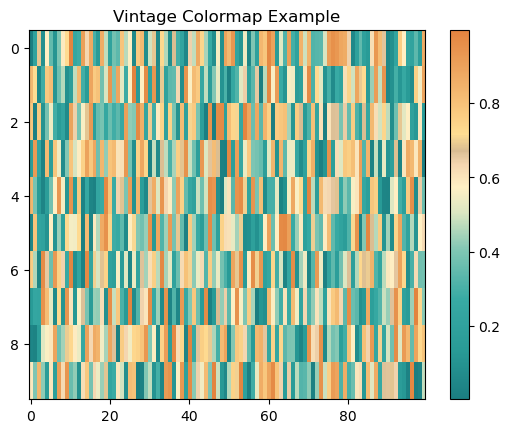

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def vintage_colormap(vert_spacing):
    dz = 0.1  # vertical spacing

    # Colors in the colormap
    base_colors = np.array([
        [27, 126, 129],    # Deepest (darkest green-blue): -20 m NAP
        [41, 155, 151],    # Deeper (dark green-blue): -16 m NAP
        [56, 170, 164],    # Deep (green-blue): -12 m NAP
        [130, 199, 180],   # Subtidal (light green-blue): -8 m NAP
        [220, 231, 194],   # Shallow Subtidal (lighter green blue): -5 m NAP
        [255, 240, 196],   # Shoal (off-white): -3 m NAP
        [244, 214, 176],   # Low Tide (light brown): -1.2 m NAP
        [217, 188, 146],   # High Tide (darker brown): 0 m NAP
        [255, 221, 146],   # Beach (yellowy brown): 1.4 m NAP
        [226, 129, 61]     # Dune (orange): 10 m NAP
    ]) / 255.0  # Normalize to [0, 1] range

    cmap = []

    # Loop through and create new colormap
    for i in range(len(base_colors) - 1):
        for j in range(int((vert_spacing[i + 1] - vert_spacing[i]) / dz)):
            interp_factor = (j * dz) / (vert_spacing[i + 1] - vert_spacing[i])
            new_color = base_colors[i] + interp_factor * (base_colors[i + 1] - base_colors[i])
            cmap.append(new_color)

    return np.array(cmap)

# Example usage
vert_spacing = np.array([-20, -16, -12, -8, -5, -3, -1.2, 0, 1.4, 10])

cmap_array = vintage_colormap(vert_spacing)

print(cmap_array.shape)
print(cmap_array)

# Create a custom colormap in matplotlib
custom_cmap = plt.cm.colors.ListedColormap(cmap_array)

# Use the custom colormap in a plot
plt.imshow(np.random.rand(10, 100), aspect='auto', cmap=custom_cmap)
plt.colorbar()
plt.title('Vintage Colormap Example')
plt.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_86300\3117103495.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 256)


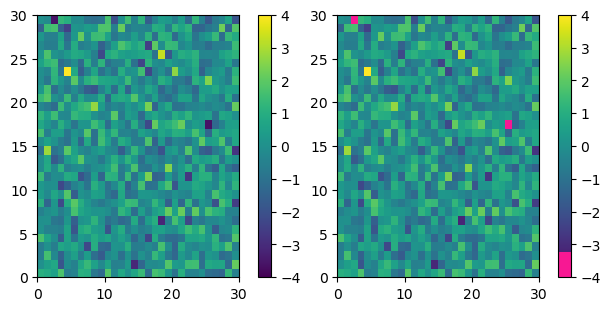

(256, 4)
[[0.96875  0.09375  0.578125 1.      ]
 [0.96875  0.09375  0.578125 1.      ]
 [0.96875  0.09375  0.578125 1.      ]
 ...
 [0.974417 0.90359  0.130215 1.      ]
 [0.983868 0.904867 0.136897 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

print(newcolors.shape)
print(newcolors)

(366, 179)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
1170.6843519191514


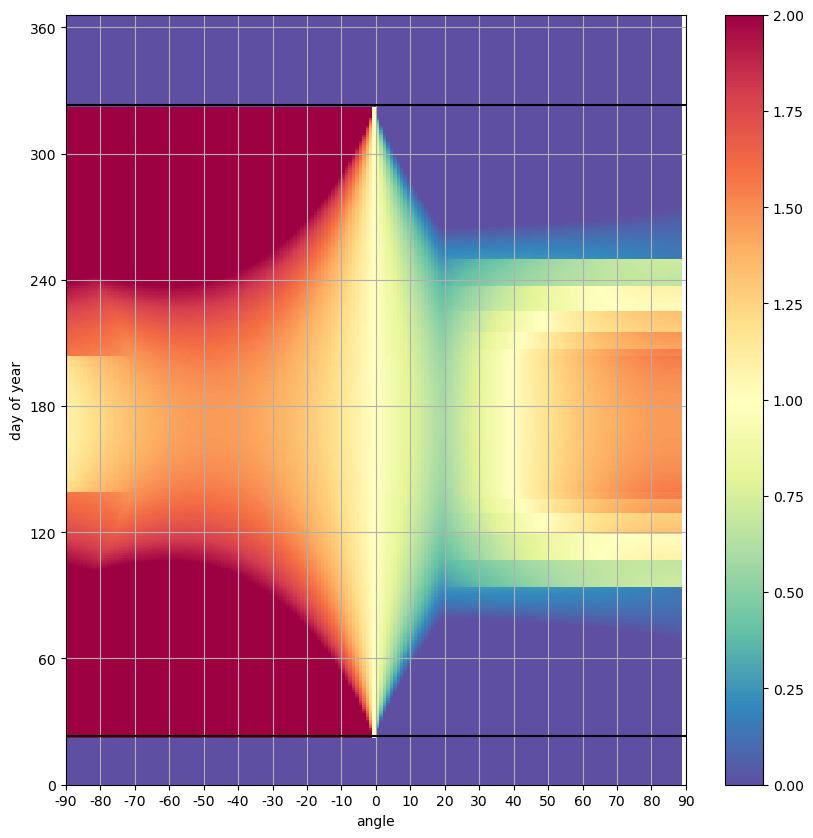

In [27]:
solar_flux_map = np.loadtxt("solar_flux_map.txt")

print(solar_flux_map.shape)
print(solar_flux_map)


fig, ax = plt.subplots(figsize=(10, 10))

psm = ax.pcolormesh(solar_flux_map, cmap='Spectral_r', rasterized=True, vmin=0, vmax=2)

plt.colorbar(psm)

plt.xticks(np.arange(0, 190, 10), np.arange(-90, 100, 10))
plt.yticks(np.arange(0, 420, 60), np.arange(0, 420, 60))

plt.xlim((0, 180))

plt.grid()

plt.xlabel("angle")
plt.ylabel("day of year")

plt.hlines([23, 323], xmin=0, xmax=180, color='k')

print(np.min(solar_flux_map))
print(np.max(solar_flux_map))

In [14]:
x = np.linspace(0, 10, 101)
z = x**2
np.gradient(z, x)

array([ 0.1,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 19.9])

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_95744\3943014717.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter([],[],color=[],norm=norm, cmap='seismic', s=10)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_95744\3943014717.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


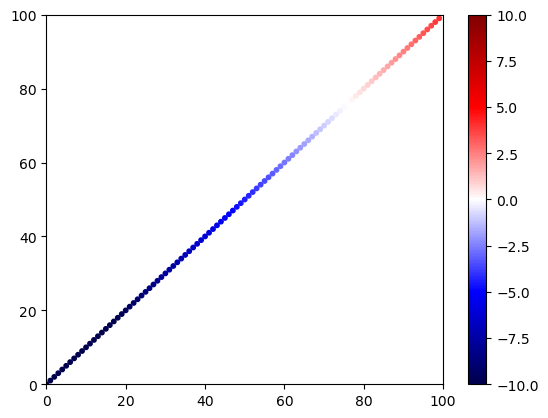

In [45]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import numpy as np

norm = Normalize(vmin=-10, vmax=10)

sm = ScalarMappable(norm, cmap='seismic')

temp = np.linspace(-13, 4, 100)

temp_norm = sm.to_rgba(temp)

x = np.arange(len(temp))

z = x

fig, ax = plt.subplots()

# scatter = ax.scatter(x, z, c=temp_norm, norm=norm, cmap='seismic')
scatter = ax.scatter([],[],color=[],norm=norm, cmap='seismic', s=10)

plt.colorbar(sm, ax=ax)

scatter.set_offsets(np.column_stack((x, z)))
scatter.set_fc(temp_norm)
scatter.set_ec(temp_norm)
scatter.set_alpha(1)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

fig.show()

In [49]:
import xarray as xr
import numpy as np

# Create an initial dataset
time = np.arange('2022-01-01', '2022-01-10', dtype='datetime64[D]')
lat = np.linspace(-90, 90, 5)
lon = np.linspace(-180, 180, 5)
temperature = np.random.rand(len(time), len(lat), len(lon))

ds = xr.Dataset(
    {"temperature": (["time", "lat", "lon"], temperature)},
    coords={"time": time, "lat": lat, "lon": lon}
)

# Print initial dataset
print("Initial dataset:")
print(ds)

# New coordinate variable
altitude = np.linspace(0, 1000, 5)

# Add the new coordinate
ds = ds.assign_coords(altitude=altitude)

# Print updated dataset
print("\nDataset with new coordinate 'altitude':")
print(ds)

Initial dataset:
<xarray.Dataset> Size: 2kB
Dimensions:      (time: 9, lat: 5, lon: 5)
Coordinates:
  * time         (time) datetime64[ns] 72B 2022-01-01 2022-01-02 ... 2022-01-09
  * lat          (lat) float64 40B -90.0 -45.0 0.0 45.0 90.0
  * lon          (lon) float64 40B -180.0 -90.0 0.0 90.0 180.0
Data variables:
    temperature  (time, lat, lon) float64 2kB 0.1912 0.6946 ... 0.7041 0.4291

Dataset with new coordinate 'altitude':
<xarray.Dataset> Size: 2kB
Dimensions:      (time: 9, lat: 5, lon: 5, altitude: 5)
Coordinates:
  * time         (time) datetime64[ns] 72B 2022-01-01 2022-01-02 ... 2022-01-09
  * lat          (lat) float64 40B -90.0 -45.0 0.0 45.0 90.0
  * lon          (lon) float64 40B -180.0 -90.0 0.0 90.0 180.0
  * altitude     (altitude) float64 40B 0.0 250.0 500.0 750.0 1e+03
Data variables:
    temperature  (time, lat, lon) float64 2kB 0.1912 0.6946 ... 0.7041 0.4291


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_95744\1578574705.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(
